# OCR SYSTEM

#### Import Libraries

In [49]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#### Import sample images

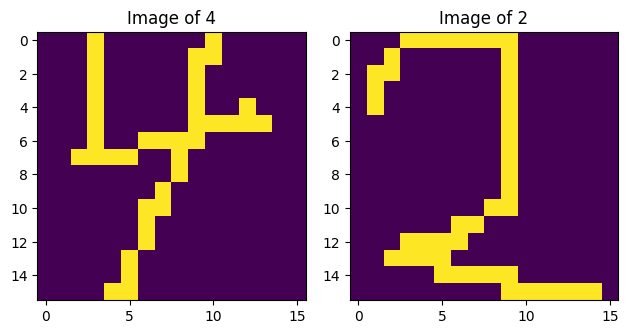

In [50]:
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img = np.reshape(img4,(16,16),order= 'F')
img1 = np.reshape(img2,(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[0].set_title('Image of 4')
axes[1].imshow(img1)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

## Import Data from the Files

#### Training Data

In [84]:
# Import Data from the Files
#Your code here
data = np.loadtxt("trainX.txt")
data.shape

(500, 256)

In [52]:
data1 = np.loadtxt("trainY.txt")
data1.shape

(500,)

Expected Output <br>
- Shape of X_train : (500, 256) <br>
- Shape of y_train : (500,)

### Testing Data

In [85]:
#Your code here
data2 = np.loadtxt("testX.txt")
data2.shape


(100, 256)

In [77]:
data3 = np.loadtxt("testY.txt")
data3.shape



(100,)

Expected Output <br>
- Shape of X_train : (100, 256) <br>
- Shape of y_train : (100,)


### Dividing Data W.R.T its Classes

##### Training Data

In [55]:
# AS we know first 250 images are of 2 so we will take first 250 images from X_train
# your code here
img2_X_train = data.iloc[:250,:]
img4_X_train = data.iloc[250:,:]
print(img2_X_train.shape)
print(img4_X_train.shape)

(250, 256)
(250, 256)


##### Another way
You can coment the below code if you dont want to try this effective way and will use the above code to divide the data into classes

In [56]:
#But in case if we didn't know that first 250 images are of 2 then we can use this code
#This img2_X_train will contain only only those images from X_train which have corresponding label of 2 in Y_train
img2_X_train = data[data1 == 2]
img4_X_train = data[data1 == 4]
print(img2_X_train.shape)
print(img4_X_train.shape)

(250, 256)
(250, 256)


Expected Output <br>
- Shape of X_train : (250, 256) <br>
- Shape of y_train : (250, 256)


##### Testing Data

In [57]:
# Your code here

img2_X_test = data2[data3[0] == 2]
img4_X_test = data2[data3[0] == 4]
print(img2_X_test.shape)
print(img4_X_test.shape)

(50, 256)
(50, 256)


Expected Output <br>
- Shape of X_train : (50, 256) <br>
- Shape of y_train : (50, 256)


### Finding the Probabilities

### Training Data

##### Probabailty of 1s and 0s

In [58]:
# Finding the Probabilities
# Probabailty of 1s and 0s in the images of 2

img2_one_prob = np.mean(img2_X_train)
img2_zero_prob = 1 - img2_one_prob
img4_one_prob = np.mean(img4_X_train)
img4_zero_prob = 1 - img4_one_prob

print(img2_one_prob.shape)
print(img2_zero_prob.shape)
print(img4_one_prob.shape)
print(img4_zero_prob.shape)

(256,)
(256,)
(256,)
(256,)


c:\Users\ST\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Expected Output <br>
- (256,)
- (256,)
- (256,)
- (256,)


#### Class Probabilities

In [59]:
# Class Probabilities
# Your code here
class_2_prob = img2_X_train.shape[0]/data.shape[0]
class_4_prob = img4_X_train.shape[0]/data.shape[0]
print(class_2_prob)
print(class_4_prob)

0.5
0.5


#### Predictions

In [60]:
# Your code here

pred_2 = np.array(np.prod(np.where(data == 1, img2_one_prob, img2_zero_prob), axis=1)*class_2_prob)
pred_4 = np.array(np.prod(np.where(data == 1, img4_one_prob, img4_zero_prob), axis=1)*class_4_prob)
predictions_train = np.where(pred_2 > pred_4, 2, 4)
predictions_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

#### Overall Accuracy

In [61]:
# Your code here
TN = predictions_train[(predictions_train == 2) & (predictions_train == data1)]
print("Actual:2 | Pred:2 -->",len(TN))
TP=predictions_train[(predictions_train == 4) & (predictions_train == data1)]
print("Actual:4 | Pred:4 -->",len(TP))
FN=predictions_train[(predictions_train == 2) & (predictions_train != data1)]
print("Actual:4 | Pred:2 -->",len(FN))
FP=predictions_train[(predictions_train == 4) & (predictions_train != data1)]
print("Actual:2 | Pred:4 -->",len(FP))

overall_Accuracy = (len(TP) + len(TN))/len(data1)
print("\nOverall Accuracy = ", overall_Accuracy)

Actual:2 | Pred:2 --> 249
Actual:4 | Pred:4 --> 248
Actual:4 | Pred:2 --> 2
Actual:2 | Pred:4 --> 1

Overall Accuracy =  0.994


#### Classwise Accuracy

In [69]:
# Your code here
class2_train_total_accuracy = len(TN)/250
class4_train_total_accuracy = len(TP)/250

print("Total accuracy of Training data given class 2: ", class2_train_total_accuracy)
print("Total accuracy of Training data given class 4: " , class4_train_total_accuracy)

Total accuracy of Training data given class 2:  0.996
Total accuracy of Training data given class 4:  0.992


### FOR TESTING DATA

##### Probabailty of 1s and 0s

In [63]:
img2_one_prob_test = np.mean(img2_X_test)
img2_zero_prob_test = 1 - img2_one_prob
img4_one_prob_test = np.mean(img4_X_test)
img4_zero_prob_test = 1 - img4_one_prob

print(img2_one_prob_test.shape)
print(img2_zero_prob_test.shape)
print(img4_one_prob_test.shape)
print(img4_zero_prob_test.shape)

(256,)
(256,)
(256,)
(256,)


#### Class Probabilities

In [64]:
# your code here
# find Class Probabilities for testing data
class_2_prob_test = img2_X_test.shape[0]/data2.shape[0]
class_4_prob_test = img4_X_test.shape[0]/data2.shape[0]
print(class_2_prob_test)
print(class_4_prob_test)



0.5
0.5


#### Predictions

In [74]:
# your code here
pred_2 = np.array(np.prod(np.where(data2 == 1, img2_one_prob_test, img2_zero_prob_test), axis=1)*class_2_prob_test)
pred_4 = np.array(np.prod(np.where(data2 == 1, img4_one_prob_test, img4_zero_prob_test), axis=1)*class_4_prob_test)
predictions_test = np.where(pred_2 > pred_4, 2, 4)
predictions_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

#### Classwise Accuracy

In [78]:
# your code here
class2_test_total_accuracy = len(predictions_test[(predictions_test == 2) & (predictions_test == data3)])/50
class4_test_total_accuracy = len(predictions_test[(predictions_test == 4) & (predictions_test == data3)])/50

print("Total accuracy of Testing data given class 2: ", class2_test_total_accuracy)
print("Total accuracy of Testing data given class 4: ", class4_test_total_accuracy)

Total accuracy of Testing data given class 2:  1.0
Total accuracy of Testing data given class 4:  1.0


Expected Output <br>

- Total accuracy of Testing data given class 2:  1.0
<br>
- Total accuracy of Testing data given class 4:  1.0

#### Overall Accuracy

In [79]:
# your code here 

TN = predictions_test[(predictions_test == 2) & (predictions_test == data3)]
print("Actual:2 | Pred:2 -->",len(TN))
TP = predictions_test[(predictions_test == 4) & (predictions_test == data3)]
print("Actual:4 | Pred:4 -->",len(TP))
FN = predictions_test[(predictions_test == 2) & (predictions_test != data3)]
print("Actual:4 | Pred:2 -->",len(FN))
FP = predictions_test[(predictions_test == 4) & (predictions_test != data3)]
print("Actual:2 | Pred:4 -->",len(FP))

overall_Accuracy = (len(TP) + len(TN))/len(data3)
print("\nOverall Accuracy = ", overall_Accuracy)



Actual:2 | Pred:2 --> 50
Actual:4 | Pred:4 --> 50
Actual:4 | Pred:2 --> 0
Actual:2 | Pred:4 --> 0

Overall Accuracy =  1.0


Expected Output 
<br><br>
**Confusion Matrix**
<br>
TP =  50 	FP =  0
<br>
FN =  0 	TN =  50
<br>
- Overall Accuracy =  1.0

### Plot your Test pixels/features in form of image to correctly identify whether our model is giving correct results

2 plots for each class

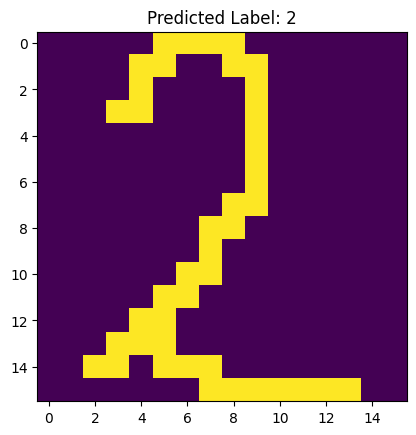

In [87]:
# Plot your Test pixels/features in form of image to correctly identify whether our model is giving correct results
# your code here
img_label = predictions_test[13]
img = np.reshape(data2[15],(16,16),order= 'F')
plt.title('Predicted Label: '+str(img_label))
plt.imshow(img)
plt.show()



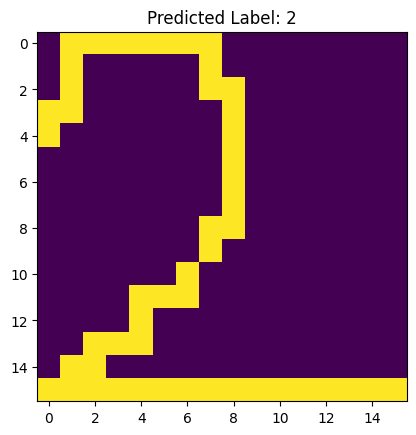

In [89]:
img_label = predictions_test[17]
img = np.reshape(data2[20],(16,16),order= 'F')
plt.title('Predicted Label: '+str(img_label))
plt.imshow(img)
plt.show()

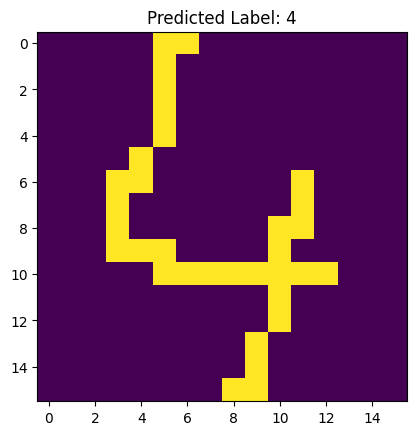

In [90]:
img_label = predictions_test[85]
img = np.reshape(data2[85],(16,16),order= 'F')
plt.title('Predicted Label: '+str(img_label))
plt.imshow(img)
plt.show()

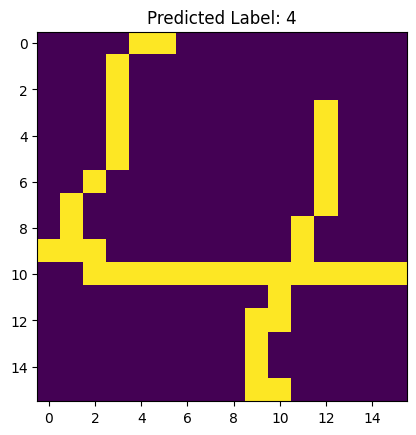

In [91]:
img_label = predictions_test[90]
img = np.reshape(data2[90],(16,16),order= 'F')
plt.title('Predicted Label: '+str(img_label))
plt.imshow(img)
plt.show()

Your Opinion on the results about why naive bayes worked well for  this OCR
and give one example where naive bayes can not be used


Solution :

Naïve Bayes classifiers are popular in OCR systems due to their simplicity, efficiency, and often surprisingly good performance in text classification tasks. Here's my opinion on why Naïve Bayes worked well for OCR systems:

1. Simple and Fast: Naïve Bayes classifiers are computationally efficient and easy to implement, making them suitable for OCR systems where speed is crucial, especially when processing large volumes of text.

2. Effective for Text Classification: OCR essentially involves classifying images of characters into different categories (i.e., alphanumeric characters). Naïve Bayes classifiers perform well in text classification tasks, making them a natural choice for OCR systems.

3. Robust to Noise: OCR systems often deal with noisy or imperfect input data due to variations in font styles, sizes, and quality of scanned documents. Naïve Bayes classifiers are robust to such noise and can still perform well even with imperfect data.

4. Independence Assumption: Despite its simplicity, the Naïve Bayes classifier's assumption of feature independence often holds reasonably well in OCR tasks. While this assumption may not strictly hold in all cases, it generally doesn't significantly impact the classifier's performance in OCR.

However, there are scenarios where Naïve Bayes may not be appropriate:

Example:
In sentiment analysis tasks where the context and relationships between words are crucial for determining sentiment, Naïve Bayes may not perform as well. This is because the classifier assumes that features (words) are independent of each other, which is not the case for sentiment analysis where the meaning of a word can be highly dependent on the context and surrounding words. More sophisticated models like recurrent neural networks (RNNs) or transformers are often more suitable for capturing such dependencies and achieving better performance in sentiment analysis tasks.